In [10]:
from bayes_implicit_solvent.continuous_parameter_experiments.gradient_free import mols

In [11]:
all_mols = mols

In [12]:
from bayes_implicit_solvent.constants import beta
def unreduce(value):
    """Input value is in units of kB T, turn it into units of kilocalorie_per_mole"""
    return value / (beta * unit.kilocalorie_per_mole)

In [13]:
from autograd import numpy as np

In [14]:
mols = []
    
from bayes_implicit_solvent.utils import get_charges
from scipy.spatial.distance import pdist, squareform
from simtk import unit
elements = []
charges = []
distance_matrices = []
expt_means = []
expt_uncs = []
vacuum_trajs = []
for mol in all_mols:
    
    expt_mean = unreduce(mol.experimental_value)
    expt_unc = unreduce(mol.experimental_uncertainty)
    
    if (expt_mean > -15) and (expt_mean < 5):
        
        mols.append(mol)
        expt_means.append(expt_mean)
        expt_uncs.append(expt_unc)

        elements.append(np.array([a.element.atomic_number for a in mol.top.atoms()]))
        charges.append(get_charges(mol.sys))
        distance_matrices.append([squareform(pdist(snapshot / unit.nanometer)) for snapshot in mol.vacuum_traj])
expt_means = np.array(expt_means)
expt_uncs = np.array(expt_uncs)

In [15]:
len(all_mols[0].vacuum_traj)

50

In [16]:
print(len(mols))

631


In [17]:
from bayes_implicit_solvent.typers import SMARTSTyper

In [18]:
typer = SMARTSTyper(['[a]', '[A]', '[D1]', '[D2]', '[D3]', '[D4]', '[H0]', '[H1]', '[H2]', '[H3]', '[H4]', '[R0]', '[R2]', '[R3]', '[r0]', '[r3]', '[r4]', '[r5]', '[r6]', '[v1]', '[v2]', '[v3]', '[v4]', '[v5]', '[v6]', '[X1]', '[X2]', '[X3]', '[X4]', '[x0]', '[x2]', '[x3]', '[-1]', '[#1]', '[#6]', '[#7]', '[#8]', '[#9]', '[#15]', '[#16]', '[#17]', '[#35]', '[#53]', '*~[a]', '*~[A]', '*~[D1]', '*~[D2]', '*~[D3]', '*~[D4]', '*~[H0]', '*~[H1]', '*~[H2]', '*~[H3]', '*~[H4]', '*~[R0]', '*~[R2]', '*~[R3]', '*~[r0]', '*~[r3]', '*~[r4]', '*~[r5]', '*~[r6]', '*~[v1]', '*~[v2]', '*~[v3]', '*~[v4]', '*~[v5]', '*~[v6]', '*~[X1]', '*~[X2]', '*~[X3]', '*~[X4]', '*~[x0]', '*~[x2]', '*~[x3]', '*~[-1]', '*~[#1]', '*~[#6]', '*~[#7]', '*~[#8]', '*~[#9]', '*~[#15]', '*~[#16]', '*~[#17]', '*~[#35]', '*~[#53]', '*-*', '*-[a]', '*-[A]', '*-[D1]', '*-[D2]', '*-[D3]', '*-[D4]', '*-[H0]', '*-[H1]', '*-[H2]', '*-[H3]', '*-[H4]', '*-[h0]', '*-[R0]', '*-[R2]', '*-[R3]', '*-[r0]', '*-[r3]', '*-[r4]', '*-[r5]', '*-[r6]', '*-[v1]', '*-[v2]', '*-[v3]', '*-[v4]', '*-[v5]', '*-[v6]', '*-[X1]', '*-[X2]', '*-[X3]', '*-[X4]', '*-[x0]', '*-[x2]', '*-[x3]', '*-[-1]', '*-[#1]', '*-[#6]', '*-[#7]', '*-[#8]', '*-[#9]', '*-[#15]', '*-[#16]', '*-[#17]', '*-[#35]', '*-[#53]', '*=*', '*=[a]', '*=[A]', '*=[D1]', '*=[D2]', '*=[D3]', '*=[D4]', '*=[H0]', '*=[H1]', '*=[H2]', '*=[h0]', '*=[R0]', '*=[R2]', '*=[r0]', '*=[r5]', '*=[r6]', '*=[v2]', '*=[v3]', '*=[v4]', '*=[v5]', '*=[v6]', '*=[X1]', '*=[X2]', '*=[X3]', '*=[X4]', '*=[x0]', '*=[x2]', '*=[#6]', '*=[#7]', '*=[#8]', '*=[#15]', '*=[#16]', '*#*', '*#[A]', '*#[D1]', '*#[D2]', '*#[H0]', '*#[H1]', '*#[h0]', '*#[R0]', '*#[r0]', '*#[v3]', '*#[v4]', '*#[X1]', '*#[X2]', '*#[x0]', '*#[#6]', '*#[#7]', '*:*', '*:[a]', '*:[D2]', '*:[D3]', '*:[H0]', '*:[H1]', '*:[h0]', '*:[R2]', '*:[R3]', '*:[r5]', '*:[r6]', '*:[v2]', '*:[v3]', '*:[v4]', '*:[X2]', '*:[X3]', '*:[x2]', '*:[x3]', '*:[#6]', '*:[#7]', '*:[#16]', '*@*', '*@[a]', '*@[A]', '*@[D2]', '*@[D3]', '*@[D4]', '*@[H0]', '*@[H1]', '*@[H2]', '*@[h0]', '*@[R2]', '*@[R3]', '*@[r3]', '*@[r4]', '*@[r5]', '*@[r6]', '*@[v2]', '*@[v3]', '*@[v4]', '*@[v6]', '*@[X2]', '*@[X3]', '*@[X4]', '*@[x2]', '*@[x3]', '*@[#6]', '*@[#7]', '*@[#8]', '*@[#16]'])
computed_smarts_features = [typer.get_matches(mol.mol) for mol in mols]

In [19]:
len(set(np.hstack(charges))), len(np.hstack(charges))

(3599, 11433)

In [20]:
N = len(computed_smarts_features[0][0])
N

229

In [21]:
computed_features = computed_smarts_features

In [22]:
N = len(computed_features[0][0])
N

229

In [23]:
all_types = np.array(sorted(list(set([tuple(f) for f in np.vstack(computed_features)]))))
len(all_types)

664

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from autograd.scipy.stats import norm

In [26]:
len(distance_matrices[0])

50

In [27]:
N_atoms = np.array(list(map(len, charges)))

In [28]:
len(mols)

631

In [29]:
n_features = N
n_features

229

In [30]:
default_radius = 0.15
default_scale = 0.8
default_log_tau = 0.0
default_psi1_coeff = 0.8
default_psi2_coeff = 0.0
default_psi3_coeff = 2.909125

baseline_bias = np.array([default_radius, default_scale, default_log_tau, default_psi1_coeff, default_psi2_coeff, default_psi3_coeff])
baseline_bias

array([0.15    , 0.8     , 0.      , 0.8     , 0.      , 2.909125])

In [31]:
np.exp(-10), np.exp(1)

(4.5399929762484854e-05, 2.718281828459045)

In [32]:
def relu(x):
    return x * (x > 0)

In [33]:
import autograd.numpy.random as npr

class NeuralNet():

    def __init__(self, layer_sizes, scale=0.01):
        assert(layer_sizes[-1] == len(baseline_bias))
        self.layer_sizes = layer_sizes
        self.scale = scale
        self.params = self.init_random_params(scale, layer_sizes)

    def init_random_params(self, scale, layer_sizes, rs=npr.RandomState(0)):
        return [(scale * rs.randn(m, n),  # weight matrix
                 scale * rs.randn(n))  # bias vector
                for m, n in zip(layer_sizes[:-1], layer_sizes[1:])]

    def neural_net_predict(self, params, inputs):
        for W, b in params:
            outputs = np.dot(inputs, W) + b
            inputs = relu(outputs)
        return outputs + baseline_bias

    def __call__(self, inputs):
        return self.neural_net_predict(self.params, inputs)
    
# also produce a tau parameter for each 
npr.seed(0)
layer_sizes = [n_features, 1000, 100, len(baseline_bias)]
neural_net = NeuralNet(layer_sizes)

In [34]:
params = neural_net.params

In [35]:
neural_net(computed_features[0])

array([[ 1.34565705e-01,  7.80200599e-01,  1.04895461e-02,
         8.02188311e-01,  1.19935530e-04,  2.91574462e+00],
       [ 1.34837788e-01,  7.80075805e-01,  9.96969475e-03,
         8.01451753e-01,  4.46502372e-04,  2.91676114e+00],
       [ 1.34694812e-01,  7.80126841e-01,  1.04529614e-02,
         8.02187055e-01,  2.14175222e-04,  2.91638025e+00],
       [ 1.34990493e-01,  7.79836409e-01,  1.02714158e-02,
         8.01379370e-01, -3.50431226e-04,  2.91573596e+00],
       [ 1.34181397e-01,  7.80190880e-01,  1.03400607e-02,
         8.00826457e-01,  4.76846627e-04,  2.91636436e+00],
       [ 1.34847141e-01,  7.80019862e-01,  1.01094741e-02,
         8.02578552e-01, -8.76196827e-04,  2.91636139e+00],
       [ 1.35633877e-01,  7.80492094e-01,  1.01628339e-02,
         8.01289625e-01,  4.92504197e-04,  2.91693721e+00],
       [ 1.35633877e-01,  7.80492094e-01,  1.01628339e-02,
         8.01289625e-01,  4.92504197e-04,  2.91693721e+00],
       [ 1.34482733e-01,  7.80266367e-01,  1.004

In [36]:
#from bayes_implicit_solvent.gb_models.numpy_gb_models import compute_OBC_energy_vectorized
from bayes_implicit_solvent.gb_models.modular_gb_models import cha_gb_no_threshold

In [37]:
radii, scales, log_taus, psi_coeffs, psi2_coeffs, psi3_coeffs = neural_net.neural_net_predict(params, computed_features[0]).T
radii, scales, log_taus, psi_coeffs, psi2_coeffs, psi3_coeffs

(array([0.13456571, 0.13483779, 0.13469481, 0.13499049, 0.1341814 ,
        0.13484714, 0.13563388, 0.13563388, 0.13448273, 0.13484714,
        0.13563388, 0.13563388, 0.13521499, 0.13521499, 0.13521499,
        0.13452909, 0.13452909]),
 array([0.7802006 , 0.7800758 , 0.78012684, 0.77983641, 0.78019088,
        0.78001986, 0.78049209, 0.78049209, 0.78026637, 0.78001986,
        0.78049209, 0.78049209, 0.78066846, 0.78066846, 0.78066846,
        0.78027672, 0.78027672]),
 array([0.01048955, 0.00996969, 0.01045296, 0.01027142, 0.01034006,
        0.01010947, 0.01016283, 0.01016283, 0.01004696, 0.01010947,
        0.01016283, 0.01016283, 0.01042577, 0.01042577, 0.01042577,
        0.01034352, 0.01034352]),
 array([0.80218831, 0.80145175, 0.80218705, 0.80137937, 0.80082646,
        0.80257855, 0.80128962, 0.80128962, 0.80112075, 0.80257855,
        0.80128962, 0.80128962, 0.80199652, 0.80199652, 0.80199652,
        0.80153633, 0.80153633]),
 array([ 0.00011994,  0.0004465 ,  0.00021418, -

In [38]:
npr.seed(0)
all_inds = np.arange(len(mols))
np.random.shuffle(all_inds)
train_inds = all_inds[:470]
test_inds = all_inds[470:]

In [39]:
len(all_inds) * 0.75

473.25

In [40]:
charges[0]

array([-0.1382    ,  0.1522    ,  0.1023    ,  0.1233    , -0.3511    ,
        0.37990001, -0.1655    , -0.1655    , -0.37040001,  0.3845    ,
       -0.1723    , -0.1723    ,  0.0681    ,  0.0681    ,  0.0681    ,
        0.0944    ,  0.0944    ])

In [41]:
from autograd.scipy.misc import logsumexp
from simtk import unit
from bayes_implicit_solvent.constants import kB, temperature

kj_mol_to_kT = 1.0 * unit.kilojoule_per_mole / (kB * temperature)

def one_sided_exp(w_F):
    DeltaF = - (logsumexp(- w_F) - np.log(len(w_F)))
    return DeltaF

In [42]:
type_index = dict(zip([tuple(t) for t in all_types], range(len(all_types))))
type_index[tuple(computed_features[0][0])]

11

In [43]:
type_indices = []
for i in range(len(computed_features)):
    type_indices.append(np.array([type_index[tuple(f)] for f in computed_features[i]]))

In [44]:
np.alltrue(all_types[type_indices[0]] == computed_features[0])

True

In [45]:
def make_predictions(params, inds=train_inds, batch_size=25, randomized=True):
    all_radii, all_scales, all_log_taus, all_psi_coeffs, all_psi2_coeffs, all_psi3_coeffs = neural_net.neural_net_predict(params, all_types).T
    
    
    predictions = []
    for i in inds:
        radii, scales, log_taus, psi_coeffs, psi2_coeffs, psi3_coeffs = all_radii[type_indices[i]], all_scales[type_indices[i]], all_log_taus[type_indices[i]], all_psi_coeffs[type_indices[i]], all_psi2_coeffs[type_indices[i]], all_psi3_coeffs[type_indices[i]]
        #radii, scales, log_taus = neural_net.neural_net_predict(params, computed_features[i]).T
        taus = np.exp(log_taus)
        
        if randomized:
            dmat_inds = np.random.randint(0, len(distance_matrices[i]), batch_size)
        else:
            dmat_inds = np.arange(min(batch_size, len(distance_matrices[i])))
        W_F = np.array([cha_gb_no_threshold(distance_matrices[i][j], radii, scales, taus, charges[i], psi_coefficient=psi_coeffs, psi2_coefficient=psi2_coeffs, psi3_coefficient=psi3_coeffs) for j in dmat_inds])
        
        w_F = W_F * kj_mol_to_kT
        pred_free_energy = unreduce(one_sided_exp(w_F))
        predictions.append(pred_free_energy)
    return np.array(predictions)

In [46]:
predictions = make_predictions(params)

In [47]:
def log_prior(params):
    return - sum([np.linalg.norm(W) + np.linalg.norm(b) for (W,b) in params])
log_prior(params)

-8.63061487058597

In [48]:
from autograd.scipy.stats import t as student_t

def log_likelihood(params):
    predictions = make_predictions(params)
    return np.sum(student_t.logpdf(predictions, loc=expt_means[train_inds], scale=expt_uncs[train_inds], df=7))
    #return np.sum(norm.logpdf(predictions, loc=expt_means[train_inds], scale=expt_uncs[train_inds]))

In [49]:
def log_posterior(params):
    return log_prior(params) + log_likelihood(params)

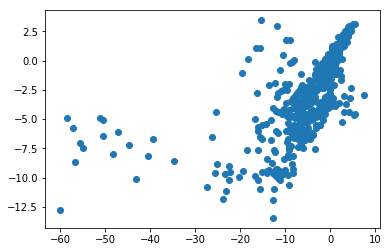

In [50]:
plt.scatter(predictions, expt_means[train_inds])

In [51]:
log_posterior(params)

-3509.5638440842367

In [52]:
from autograd import grad
g = grad(log_posterior)(params)

In [53]:
def rmse(x, y):
    squared_errors = (x - y)**2
    mean_squared_errors = np.mean(squared_errors)
    root_mean_squared_errors = np.sqrt(mean_squared_errors)
    return root_mean_squared_errors

In [54]:
from autograd.misc.optimizers import adam, sgd

def loss(x):
    return - log_posterior(x)

def grad_loss(x, i):
    return grad(loss)(x)


traj = []
prediction_traj = []
def callback(x,i,g):
    predictions = make_predictions(x, inds=np.arange(len(mols)), batch_size=50, randomized=False)
    prediction_traj.append(predictions)
    train_rmse = rmse(predictions[train_inds], expt_means[train_inds])
    test_rmse = rmse(predictions[test_inds], expt_means[test_inds])
    print('Iteration {}\n\ttrain RMSE = {:.3f}\n\ttest RMSE = {:.3f}'.format(i, train_rmse, test_rmse))
    traj.append((x,i,g))
result = adam(grad_loss, params, callback=callback, num_iters=1000)

/Users/joshuafass/anaconda3/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]


Iteration 0
	train RMSE = 9.230
	test RMSE = 8.063
Iteration 1
	train RMSE = 4.271
	test RMSE = 4.380
Iteration 2
	train RMSE = 4.030
	test RMSE = 4.103
Iteration 3
	train RMSE = 4.034
	test RMSE = 4.028
Iteration 4
	train RMSE = 4.557
	test RMSE = 4.438
Iteration 5
	train RMSE = 5.302
	test RMSE = 5.041
Iteration 6
	train RMSE = 4.731
	test RMSE = 4.554
Iteration 7
	train RMSE = 3.660
	test RMSE = 3.572
Iteration 8
	train RMSE = 3.077
	test RMSE = 2.938
Iteration 9
	train RMSE = 2.918
	test RMSE = 2.745
Iteration 10
	train RMSE = 2.833
	test RMSE = 2.679
Iteration 11
	train RMSE = 2.799
	test RMSE = 2.655
Iteration 12
	train RMSE = 2.689
	test RMSE = 2.559
Iteration 13
	train RMSE = 2.566
	test RMSE = 2.450
Iteration 14
	train RMSE = 2.467
	test RMSE = 2.367
Iteration 15
	train RMSE = 2.410
	test RMSE = 2.333
Iteration 16
	train RMSE = 2.429
	test RMSE = 2.366
Iteration 17
	train RMSE = 2.297
	test RMSE = 2.269
Iteration 18
	train RMSE = 2.152
	test RMSE = 2.174
Iteration 19
	train RM

Iteration 157
	train RMSE = 1.037
	test RMSE = 1.112
Iteration 158
	train RMSE = 0.960
	test RMSE = 1.018
Iteration 159
	train RMSE = 0.952
	test RMSE = 0.998
Iteration 160
	train RMSE = 0.981
	test RMSE = 1.045
Iteration 161
	train RMSE = 1.007
	test RMSE = 1.066
Iteration 162
	train RMSE = 0.976
	test RMSE = 1.035
Iteration 163
	train RMSE = 0.936
	test RMSE = 0.991
Iteration 164
	train RMSE = 1.075
	test RMSE = 1.149
Iteration 165
	train RMSE = 0.991
	test RMSE = 1.064
Iteration 166
	train RMSE = 0.976
	test RMSE = 1.007
Iteration 167
	train RMSE = 0.945
	test RMSE = 0.990
Iteration 168
	train RMSE = 0.987
	test RMSE = 1.065
Iteration 169
	train RMSE = 1.004
	test RMSE = 1.077
Iteration 170
	train RMSE = 0.946
	test RMSE = 1.017
Iteration 171
	train RMSE = 0.959
	test RMSE = 1.022
Iteration 172
	train RMSE = 0.933
	test RMSE = 0.996
Iteration 173
	train RMSE = 0.996
	test RMSE = 1.066
Iteration 174
	train RMSE = 0.938
	test RMSE = 0.974
Iteration 175
	train RMSE = 0.945
	test RMSE =

Iteration 312
	train RMSE = 0.740
	test RMSE = 0.934
Iteration 313
	train RMSE = 0.729
	test RMSE = 0.941
Iteration 314
	train RMSE = 0.740
	test RMSE = 0.948
Iteration 315
	train RMSE = 0.794
	test RMSE = 0.983
Iteration 316
	train RMSE = 0.740
	test RMSE = 0.960
Iteration 317
	train RMSE = 0.725
	test RMSE = 0.939
Iteration 318
	train RMSE = 0.769
	test RMSE = 0.953
Iteration 319
	train RMSE = 0.724
	test RMSE = 0.927
Iteration 320
	train RMSE = 0.720
	test RMSE = 0.943
Iteration 321
	train RMSE = 0.743
	test RMSE = 0.921
Iteration 322
	train RMSE = 0.763
	test RMSE = 0.937
Iteration 323
	train RMSE = 0.743
	test RMSE = 0.952
Iteration 324
	train RMSE = 0.737
	test RMSE = 0.957
Iteration 325
	train RMSE = 0.746
	test RMSE = 0.967
Iteration 326
	train RMSE = 0.727
	test RMSE = 0.956
Iteration 327
	train RMSE = 0.722
	test RMSE = 0.957
Iteration 328
	train RMSE = 0.737
	test RMSE = 0.947
Iteration 329
	train RMSE = 0.724
	test RMSE = 0.942
Iteration 330
	train RMSE = 0.710
	test RMSE =

KeyboardInterrupt: 

In [55]:
np.savez('feedforward_typing_march6_result_student_t_loss_with_cha_correction_df=7_with_neighbors_and_per_particle_psis_big_batch.npz',
         prediction_traj=prediction_traj,
         train_inds=train_inds,
         test_inds=test_inds,
         expt_means=expt_means,
         expt_uncs=expt_uncs,
         traj=traj[::10],
         layer_sizes=layer_sizes,
        )

In [56]:
train_rmses = [rmse(snapshot[train_inds], expt_means[train_inds]) for snapshot in prediction_traj]
test_rmses = [rmse(snapshot[test_inds], expt_means[test_inds]) for snapshot in prediction_traj]

0.35883800317534864 0.6148984986562431


Text(0, 0.5, 'MUE')

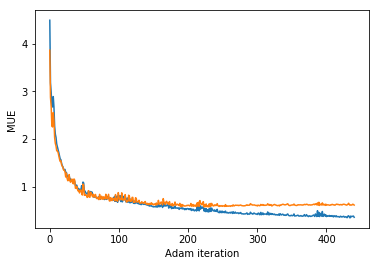

In [57]:
def mue(x,y):
    return np.mean(np.abs(x-y))

train_mues = [mue(snapshot[train_inds], expt_means[train_inds]) for snapshot in prediction_traj]
test_mues = [mue(snapshot[test_inds], expt_means[test_inds]) for snapshot in prediction_traj]

plt.plot(train_mues, )
plt.plot(test_mues)

print(train_mues[-1], test_mues[-1])
plt.xlabel('Adam iteration')
plt.ylabel('MUE')

-0.03617901350936859 -0.07283700981756588


Text(0, 0.5, 'avg errors')

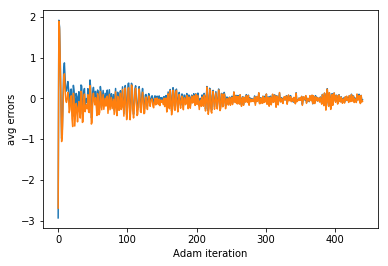

In [58]:
def average_error(x,y):
    return np.mean(x-y)

train_avg_errors = [average_error(snapshot[train_inds], expt_means[train_inds]) for snapshot in prediction_traj]
test_avg_errors = [average_error(snapshot[test_inds], expt_means[test_inds]) for snapshot in prediction_traj]

plt.plot(train_avg_errors, )
plt.plot(test_avg_errors)

print(train_avg_errors[-1], test_avg_errors[-1])
plt.xlabel('Adam iteration')
plt.ylabel('avg errors')

Text(0, 0.5, 'RMSE (kcal/mol)')

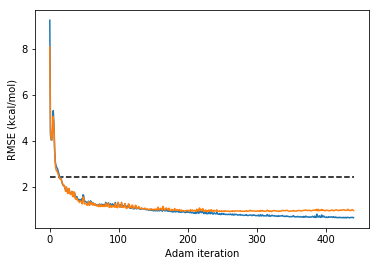

In [59]:
plt.plot(train_rmses, )
plt.plot(test_rmses)

plt.hlines(2.425900278028874, 0, len(train_rmses), linestyles='--')

plt.xlabel('Adam iteration')
plt.ylabel('RMSE (kcal/mol)')

In [60]:
train_rmses[-1], test_rmses[-1]

(0.6558019089717088, 0.97020511440037)

In [61]:
min(train_rmses), min(test_rmses)

(0.6465405526590177, 0.9207564300293462)

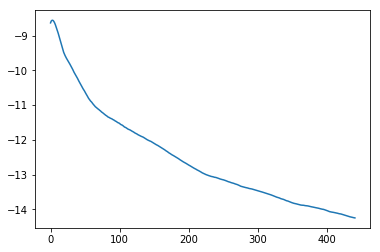

In [62]:
prior_traj = np.array([log_prior(t[0]) for t in traj])
plt.plot(prior_traj)

In [63]:
likelihood_traj = np.array([np.sum(norm.logpdf(predictions[train_inds], loc=expt_means[train_inds], scale=expt_uncs[train_inds])) for predictions in prediction_traj])

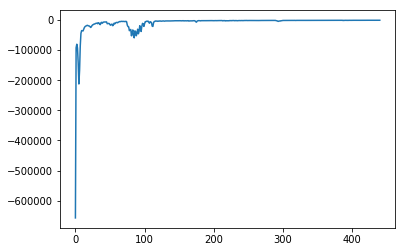

In [64]:
plt.plot(likelihood_traj)

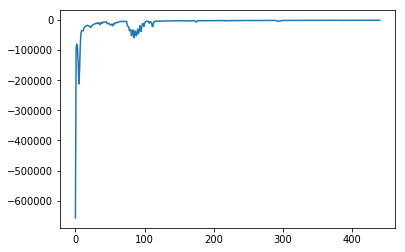

In [65]:
plt.plot(prior_traj + likelihood_traj)

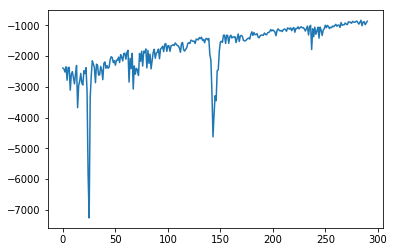

In [66]:
plt.plot((prior_traj + likelihood_traj)[150:])

In [67]:
minval, maxval = np.min(prediction_traj[3:]), np.max(prediction_traj[3:])
minval, maxval

(-51.50729949663214, 6.906153451435357)

In [68]:
minval, maxval = -15.5, 5.5
minval, maxval

(-15.5, 5.5)

In [69]:
train_color = 'lightblue'
test_color = 'green'
train_style = '--'
test_style = '-'

In [106]:
from tqdm import tqdm
from bayes_implicit_solvent.utils import remove_top_right_spines
diag = np.arange(minval, maxval)

s = 10

for t in range(len(prediction_traj)):
    plt.figure(figsize=(6*1.5,3*1.5))
    ax = plt.subplot(1,2,1)
    remove_top_right_spines(ax)
    
    plt.plot(train_rmses[:t], c=train_color, linestyle=train_style, label='train (n={})'.format(len(train_inds)))
    plt.plot(test_rmses[:t], c=test_color, linestyle=test_style, label='test (n={})'.format(len(test_inds)))
    plt.hlines(2.425900278028874, 0, len(train_rmses), linestyles='-', label='OBC2 (n=631)')
    plt.hlines(1.642, 0, len(train_rmses), linestyles='--', label='SMIRNOFF+TIP3P (n=642)')
    plt.hlines(0.98, 0, len(train_rmses), linestyles='dotted', label='OPLS3e (n=418)')
    
    plt.ylabel('RMSE (kcal/mol)')
    plt.xlabel('adam iterations')
    plt.legend(loc='upper right')
    plt.xlim(0, len(train_rmses))
    plt.ylim(0, 4)
    
    plt.title('RMSE trace')
    
    ax = plt.subplot(1,2,2)
    remove_top_right_spines(ax)
    
    plt.plot(diag, diag, linestyle='--', c='grey')
    plt.scatter(prediction_traj[t][train_inds], expt_means[train_inds], c=train_color, alpha=0.8, s=s)
    plt.scatter(prediction_traj[t][test_inds], expt_means[test_inds], c=test_color, alpha=0.8, s=s)
    plt.xlim(minval, maxval)
    plt.ylim(minval, maxval)
    plt.xticks([-15,-10,-5,0,5])
    plt.yticks([-15,-10,-5,0,5])
    
    plt.xlabel(r'predicted $\Delta G$ (kcal/mol)')
    plt.ylabel(r'measured $\Delta G$ (kcal/mol)')
    
    plt.title('train RMSE: {:.2f}\ntest RMSE: {:.2f}'.format(train_rmses[t], test_rmses[t]))
    plt.tight_layout()
    plt.savefig('neural_radii_scales_and_per_particle_psi_from_atom_and_neighbor_smarts_student_t_loss_df=7_big_batch/{:04}.png'.format(t), bbox_inches='tight')
    
    plt.close()

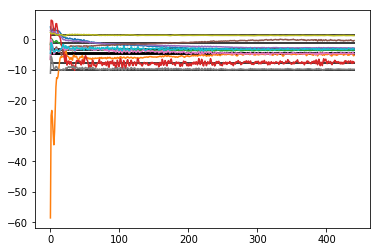

In [70]:
for i in train_inds[:10]:
    plt.plot([p[i] for p in prediction_traj])
    plt.hlines(expt_means[i], 0, len(prediction_traj))

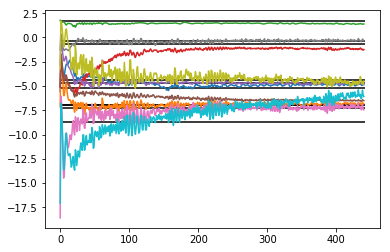

In [71]:
for i in test_inds[:10]:
    plt.plot([p[i] for p in prediction_traj])
    plt.hlines(expt_means[i], 0, len(prediction_traj))

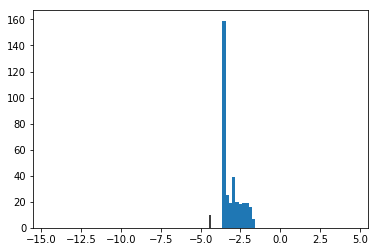

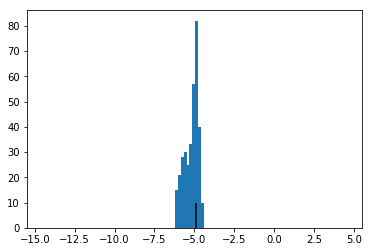

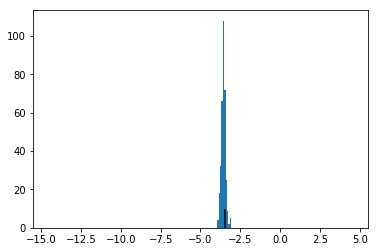

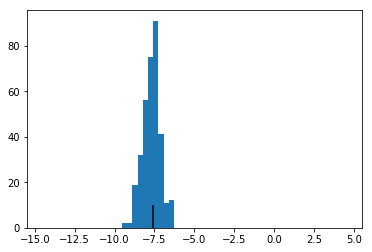

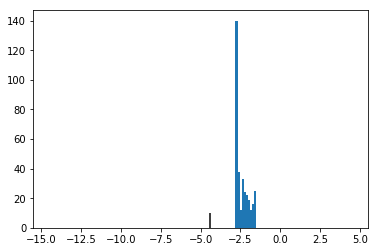

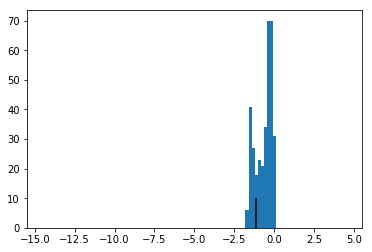

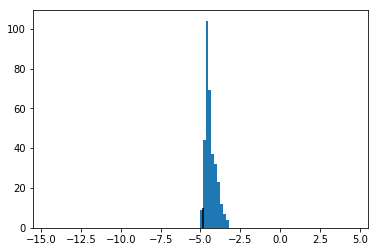

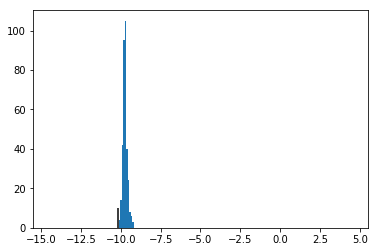

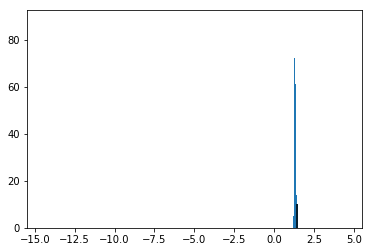

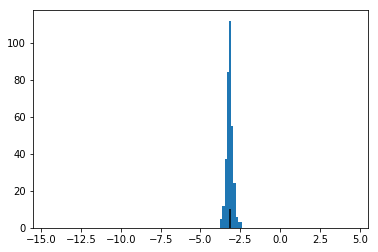

In [72]:
for i in train_inds[:10]:
    plt.figure()
    plt.hist([p[i] for p in prediction_traj[100:]])
    plt.vlines(expt_means[i], 0, 10)
    plt.xlim(minval, maxval)

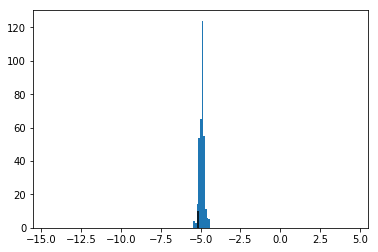

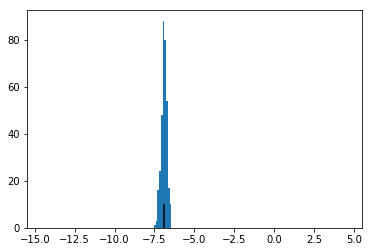

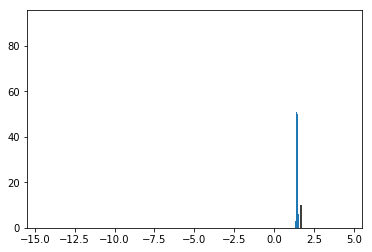

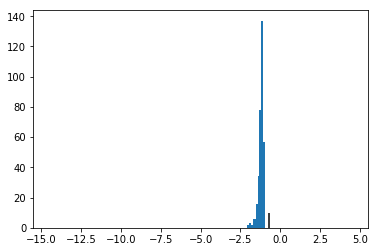

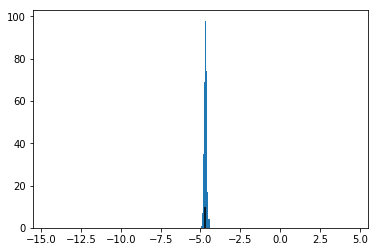

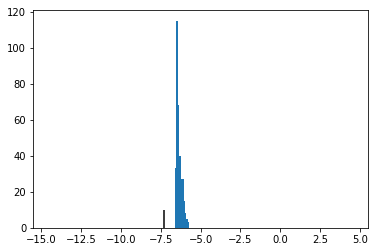

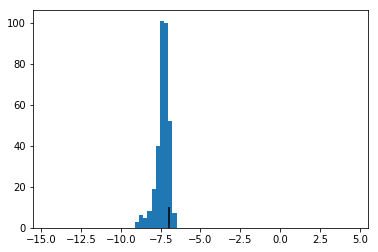

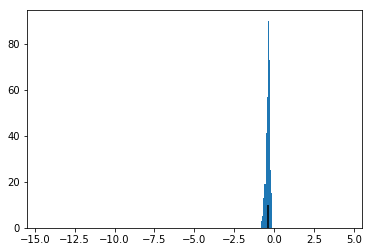

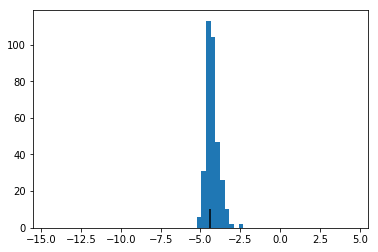

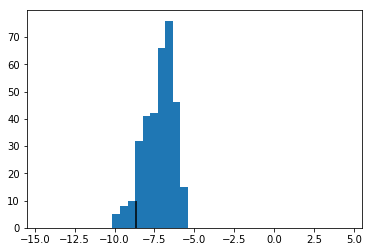

In [73]:
for i in test_inds[:10]:
    plt.figure()
    plt.hist([p[i] for p in prediction_traj[100:]])
    plt.vlines(expt_means[i], 0, 10)
    plt.xlim(minval, maxval)

In [74]:
snapshot = traj[-1][0]
radii, scales, log_taus, psi_coeffs, psi2_coeffs, psi3_coeffs = neural_net.neural_net_predict(snapshot, all_types).T

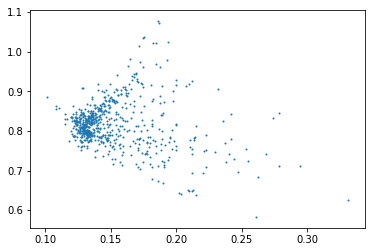

In [75]:
plt.scatter(radii, scales, s=1)

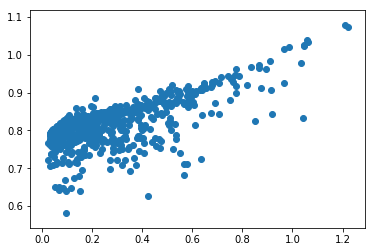

In [76]:
plt.scatter(log_taus, scales)

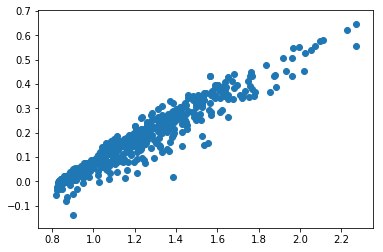

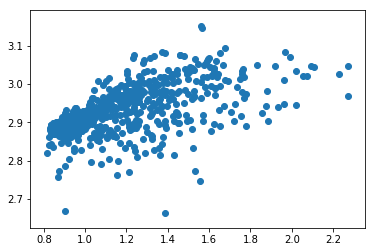

In [77]:
plt.scatter(psi_coeffs, psi2_coeffs)
plt.figure()
plt.scatter(psi_coeffs, psi3_coeffs)

In [78]:
baseline_bias

array([0.15    , 0.8     , 0.      , 0.8     , 0.      , 2.909125])

In [79]:
# greedily merge pairs of types?

all_types.shape


(664, 229)

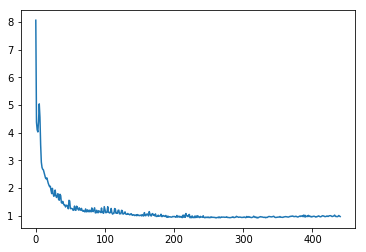

In [80]:
plt.plot(test_rmses)

In [81]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

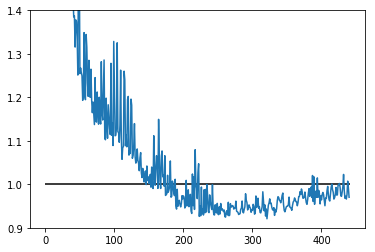

In [82]:
plt.plot(moving_average(test_rmses, n=1))
plt.ylim(0.9,1.4)
plt.hlines(1,0,len(test_rmses))

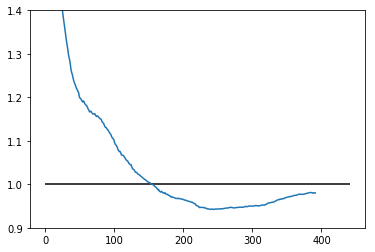

In [97]:
plt.plot(moving_average(test_rmses, n=50))
plt.ylim(0.9,1.4)
plt.hlines(1,0,len(test_rmses))

In [91]:
len(moving_average(test_rmses, n=50))

392

In [85]:
len(test_rmses)

441

In [86]:
min(moving_average(test_rmses, n=50))

0.9422627250468372

In [87]:
min(test_rmses)

0.9207564300293462